### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [34]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [35]:
df = pd.read_csv('data/coupons.csv')

In [36]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [37]:
df.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

#### 3. Decide what to do about your missing data -- drop, replace, other...

##### Replacing missing value with least category

In [38]:
df['Bar'].fillna('never', inplace=True)
df['RestaurantLessThan20'].fillna('never', inplace=True)
df['CarryAway'].fillna('never', inplace=True)
df['Restaurant20To50'].fillna('never', inplace=True)
df['CoffeeHouse'].fillna('never', inplace=True)
df['car'].fillna("do not drive", inplace=True)
df.isnull().sum().sort_values()

destination             0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
car                     0
income                  0
occupation              0
education               0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passanger               0
direction_opp           0
Y                       0
dtype: int64

##### Copying into new dataframe for cleaning

In [39]:
cleaned = df.copy()

##### Replacing string categories to numeric categories

In [40]:
# Assigning numeric category to gender
cleaned['gender'] = cleaned['gender'].str.replace('Female',"1")
cleaned['gender'] = cleaned['gender'].str.replace('Male',"0")

# Assigning numeric category to age
cleaned['age'] = cleaned['age'].str.replace('below21',"20")
cleaned['age'] = cleaned['age'].str.replace('50plus',"51")

# Assigning numeric category to expiration
cleaned['expiration'] = cleaned['expiration'].str.replace('2h',"2")
cleaned['expiration'] = cleaned['expiration'].str.replace('1d',"24")

# Assigning numeric category to time
cleaned['time'] = cleaned['time'].str.replace('7AM',"7")
cleaned['time'] = cleaned['time'].str.replace('10AM',"10")
cleaned['time'] = cleaned['time'].str.replace('2PM',"14")
cleaned['time'] = cleaned['time'].str.replace('6PM',"18")
cleaned['time'] = cleaned['time'].str.replace('10PM',"22")

# Assigning numeric category to number of bar visits
cleaned['Bar'] = cleaned['Bar'].str.replace('never',"0")
cleaned['Bar'] = cleaned['Bar'].str.replace('less1',"1")
cleaned['Bar'] = cleaned['Bar'].str.replace('1~3',"2")
cleaned['Bar'] = cleaned['Bar'].str.replace('4~8',"6")
cleaned['Bar'] = cleaned['Bar'].str.replace('gt8',"10")

# Assigning numeric category to number of carry away visits
cleaned['CarryAway'] = cleaned['CarryAway'].str.replace('never',"0")
cleaned['CarryAway'] = cleaned['CarryAway'].str.replace('less1',"1")
cleaned['CarryAway'] = cleaned['CarryAway'].str.replace('1~3',"2")
cleaned['CarryAway'] = cleaned['CarryAway'].str.replace('4~8',"6")
cleaned['CarryAway'] = cleaned['CarryAway'].str.replace('gt8',"10")

# Assigning numeric category to number of coffee house visits
cleaned['CoffeeHouse'] = cleaned['CoffeeHouse'].str.replace('never',"0")
cleaned['CoffeeHouse'] = cleaned['CoffeeHouse'].str.replace('less1',"1")
cleaned['CoffeeHouse'] = cleaned['CoffeeHouse'].str.replace('1~3',"2")
cleaned['CoffeeHouse'] = cleaned['CoffeeHouse'].str.replace('4~8',"6")
cleaned['CoffeeHouse'] = cleaned['CoffeeHouse'].str.replace('gt8',"10")

# Assigning numeric category to number of cheap restaurant visits
cleaned['RestaurantLessThan20'] = cleaned['RestaurantLessThan20'].str.replace('never',"0")
cleaned['RestaurantLessThan20'] = cleaned['RestaurantLessThan20'].str.replace('less1',"1")
cleaned['RestaurantLessThan20'] = cleaned['RestaurantLessThan20'].str.replace('1~3',"2")
cleaned['RestaurantLessThan20'] = cleaned['RestaurantLessThan20'].str.replace('4~8',"6")
cleaned['RestaurantLessThan20'] = cleaned['RestaurantLessThan20'].str.replace('gt8',"10")

# Assigning numeric category to number of mid range restaurant visits
cleaned['Restaurant20To50'] = cleaned['Restaurant20To50'].str.replace('never',"0")
cleaned['Restaurant20To50'] = cleaned['Restaurant20To50'].str.replace('less1',"1")
cleaned['Restaurant20To50'] = cleaned['Restaurant20To50'].str.replace('1~3',"2")
cleaned['Restaurant20To50'] = cleaned['Restaurant20To50'].str.replace('4~8',"6")
cleaned['Restaurant20To50'] = cleaned['Restaurant20To50'].str.replace('gt8',"10")

# Assigning numeric category to income
cleaned['income'] = cleaned['income'].str.replace("Less than $12500","12000", regex=False)
cleaned['income'] = cleaned['income'].str.replace('$12500 - $24999',"24000", regex=False)
cleaned['income'] = cleaned['income'].str.replace('$25000 - $37499',"37000", regex=False)
cleaned['income'] = cleaned['income'].str.replace('$37500 - $49999',"49000", regex=False)
cleaned['income'] = cleaned['income'].str.replace('$50000 - $62499',"62000", regex=False)
cleaned['income'] = cleaned['income'].str.replace('$62500 - $74999',"74000", regex=False)
cleaned['income'] = cleaned['income'].str.replace('$75000 - $87499',"87000", regex=False)
cleaned['income'] = cleaned['income'].str.replace('$87500 - $99999',"99000", regex=False)
cleaned['income'] = cleaned['income'].str.replace('$100000 or More',"110000", regex=False)

# Assigning numeric category to passanger
cleaned['passanger'] = cleaned['passanger'].str.replace("Alone","A", regex=False)
cleaned['passanger'] = cleaned['passanger'].str.replace('Friend(s)',"F", regex=False)
cleaned['passanger'] = cleaned['passanger'].str.replace('Partner',"P", regex=False)
cleaned['passanger'] = cleaned['passanger'].str.replace('Kid(s)',"K", regex=False)

##### Changing datatype for numeric categories above

In [41]:
cleaned['gender'] = pd.to_numeric(cleaned['gender'])

cleaned['age'] = pd.to_numeric(cleaned['age'])

cleaned['expiration'] = pd.to_numeric(cleaned['expiration'])

cleaned['time'] = pd.to_numeric(cleaned['time'])

cleaned['Bar'] = pd.to_numeric(cleaned['Bar'])

cleaned['CarryAway'] = pd.to_numeric(cleaned['CarryAway'])

cleaned['CoffeeHouse'] = pd.to_numeric(cleaned['CoffeeHouse'])

cleaned['RestaurantLessThan20'] = pd.to_numeric(cleaned['RestaurantLessThan20'])

cleaned['Restaurant20To50'] = pd.to_numeric(cleaned['Restaurant20To50'])

cleaned['income'] = pd.to_numeric(cleaned['income'])


In [42]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  int64 
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  int64 
 7   gender                12684 non-null  int64 
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  int64 
 14  car                   12684 non-null  object
 15  Bar                   12684 non-null

#### 4. What proportion of the total observations chose to accept the coupon? 



56.84326710816777


<AxesSubplot:xlabel='Y', ylabel='Count'>

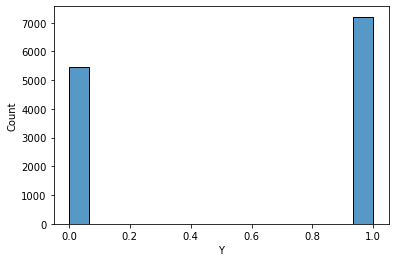

In [43]:
accepted = cleaned['Y'].value_counts()[1]
total = cleaned.shape[0]
proportion = (accepted/total)*100
print(proportion)
sns.histplot(cleaned, x="Y")

#### 5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

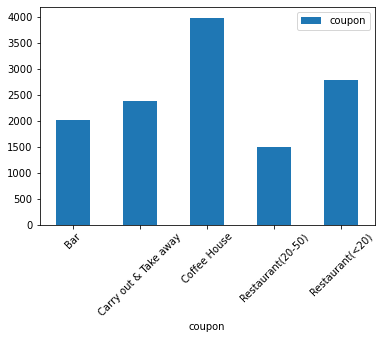

In [44]:
cleaned.groupby('coupon')[['coupon']].count().plot(kind='bar')
plt.xticks(rotation='45')

#### 6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

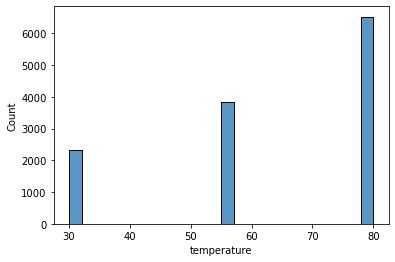

In [45]:
sns.histplot(cleaned, x="temperature")

### **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.


In [46]:
cleaned_bar = cleaned.query('coupon == "Bar"')
cleaned_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,K,Sunny,80,10,Bar,24,1,21,Unmarried partner,...,0,0,6,2,1,1,0,0,1,0
13,Home,A,Sunny,55,18,Bar,24,1,21,Unmarried partner,...,0,0,6,2,1,0,0,1,0,1
17,Work,A,Sunny,55,7,Bar,24,1,21,Unmarried partner,...,0,0,6,2,1,1,1,0,1,0
24,No Urgent Place,F,Sunny,80,10,Bar,24,0,21,Single,...,1,6,6,1,1,0,0,0,1,1
35,Home,A,Sunny,55,18,Bar,24,0,21,Single,...,1,6,6,1,1,0,0,1,0,1


#### 2. What proportion of bar coupons were accepted?


41.00148735746158


<AxesSubplot:xlabel='Y', ylabel='Count'>

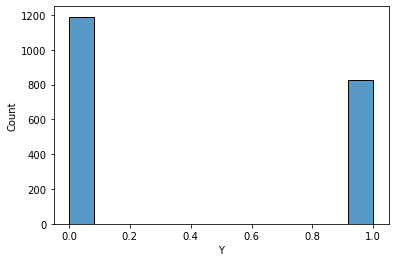

In [47]:
accepted = cleaned_bar['Y'].value_counts()[1]
total = cleaned_bar.shape[0]
proportion = (accepted/total)*100
print(proportion)
sns.histplot(cleaned_bar, x="Y")

#### Working with data where bar coupon was accepted

In [49]:
cleaned_bar_accepted = cleaned_bar.query('Y == 1')

#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Text(0.5, 1.0, 'Acceptance rate comparison based on number of visits')

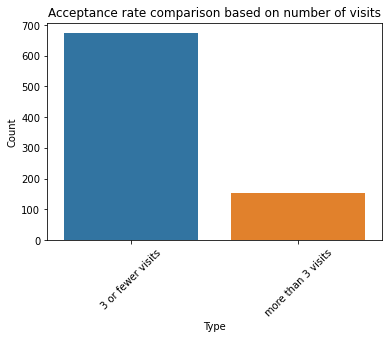

In [55]:
lst0 = []
lst0.append(['3 or fewer visits',cleaned_bar_accepted.query('Bar <= 3')['Y'].count()])
lst0.append(['more than 3 visits',cleaned_bar_accepted.query('Bar > 3')['Y'].count()])
df3 = pd.DataFrame(lst0, columns = ['Type', 'Count'])
sns.barplot(x=df3['Type'],y=df3['Count'])
plt.xticks(rotation='45')
plt.title("Acceptance rate comparison based on number of visits")

#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 1.0, 'Acceptance rate based on age')

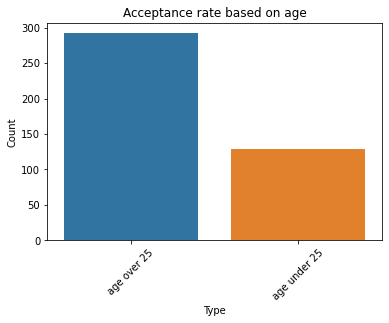

In [59]:
lst1 = []
lst1.append(['age over 25',cleaned_bar_accepted.query('Bar > 1 & age > 25')['Y'].count()])
lst1.append(['age under 25',cleaned_bar_accepted.query('Bar <= 1 & age <= 25')['Y'].count()])
df4 = pd.DataFrame(lst1, columns = ['Type', 'Count'])
sns.barplot(x=df4['Type'],y=df4['Count'])
plt.xticks(rotation='45')
plt.title("Acceptance rate based on age")

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

#### 7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Text(0.5, 1.0, 'Acceptance rate based on passanger and occupation')

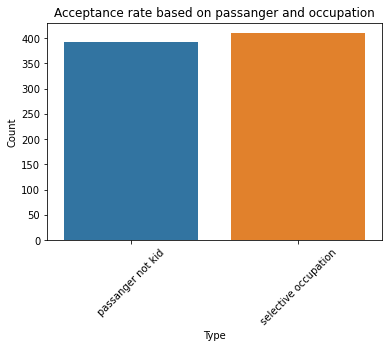

In [61]:
# who go to bars more than once a month
# had passengers that were not a kid
# had occupations other than farming, fishing, or forestry
list_occ = ['Farming Fishing & Forestry']

lst2 = []
lst2.append(['passanger not kid',cleaned_bar_accepted.query('Bar > 1 & passanger != "K"')['Y'].count()])
lst2.append(['selective occupation',cleaned_bar_accepted.query('Bar > 1 & occupation not in @list_occ')['Y'].count()])
df5 = pd.DataFrame(lst2, columns = ['Type', 'Count'])

sns.barplot(x=df5['Type'],y=df5['Count'])
plt.xticks(rotation='45')
plt.title("Acceptance rate based on passanger and occupation")

#### 8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Text(0.5, 1.0, 'Acceptance rate based on age')

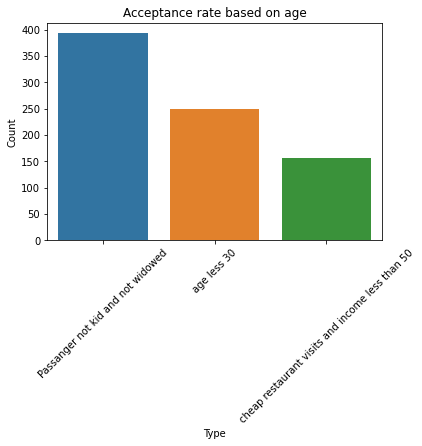

In [63]:
lst3 = []
lst3.append(['Passanger not kid and not widowed',cleaned_bar_accepted.query('Bar > 1 & passanger != "K" & maritalStatus != "Widowed"')['Y'].count()])
lst3.append(['age less 30',cleaned_bar_accepted.query('Bar > 1 & age < 30')['Y'].count()])
lst3.append(['cheap restaurant visits and income less than 50',cleaned_bar_accepted.query('RestaurantLessThan20 > 4 & income < 50000')['Y'].count()])
df6 = pd.DataFrame(lst3, columns = ['Type', 'Count'])
sns.barplot(x=df6['Type'],y=df6['Count'])
plt.xticks(rotation='45')
plt.title("Acceptance rate based on age")

#### 9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

Based on above observations, it can be seen that bar coupons are accepted mostly by passengers going to bar 3 or fewer times and are over the age of 25. These passengers belong to occupations other than farming, fishing, or forestry and were neither kids or widowed.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### **Investigating the Coffee House Coupons**

#### 1. Create a new `DataFrame` that contains just the coffee house coupons.

In [64]:
cleaned_ch = cleaned.query('coupon == "Coffee House"')
cleaned_ch.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,F,Sunny,80,10,Coffee House,2,1,21,Unmarried partner,...,0,0,6,2,1,0,0,0,1,0
3,No Urgent Place,F,Sunny,80,14,Coffee House,2,1,21,Unmarried partner,...,0,0,6,2,1,1,0,0,1,0
4,No Urgent Place,F,Sunny,80,14,Coffee House,24,1,21,Unmarried partner,...,0,0,6,2,1,1,0,0,1,0
12,No Urgent Place,K,Sunny,55,18,Coffee House,2,1,21,Unmarried partner,...,0,0,6,2,1,1,0,0,1,1
15,Home,A,Sunny,80,18,Coffee House,2,1,21,Unmarried partner,...,0,0,6,2,1,0,0,0,1,0


#### 2. What proportion of coffee house coupons were accepted?

1995 3996
49.92492492492492


<AxesSubplot:xlabel='Y', ylabel='Count'>

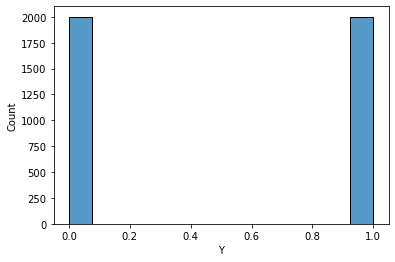

In [65]:
accepted = cleaned_ch['Y'].value_counts()[1]
accepted
total = cleaned_ch.shape[0]
print(accepted, total)
proportion = (accepted/total)*100
print(proportion)
sns.histplot(cleaned_ch, x="Y")

#### Working with data where coupon was accepted

In [24]:
cleaned_ch_accepted = cleaned_ch.query('Y == 1')

#### 3. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

Text(0.5, 1.0, 'Acceptance rate based on visits')

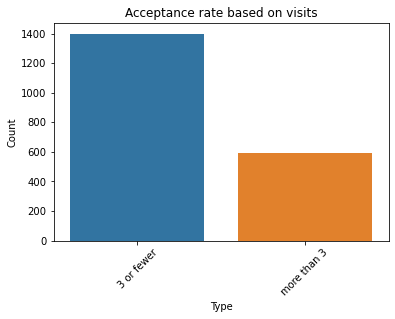

In [67]:
lst00 = []
lst00.append(['3 or fewer',cleaned_ch_accepted.query('CoffeeHouse < 3')['Y'].count()])
lst00.append(['more than 3',cleaned_ch_accepted.query('CoffeeHouse > 3')['Y'].count()])
df00 = pd.DataFrame(lst00, columns = ['Type', 'Count'])
sns.barplot(x=df00['Type'],y=df00['Count'])
plt.xticks(rotation='45')
plt.title("Acceptance rate based on visits")

#### 4. Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 30 to the all others.

Text(0.5, 1.0, 'Acceptance rate based on age')

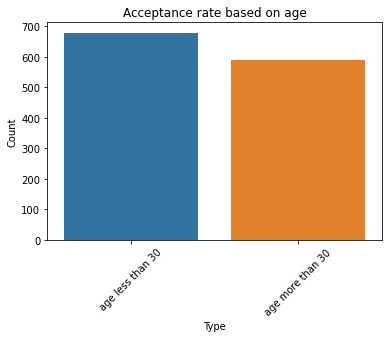

In [68]:
lst01 = []
lst01.append(['age less than 30',cleaned_ch_accepted.query('CoffeeHouse > 1 and age<=30')['Y'].count()])
lst01.append(['age more than 30',cleaned_ch_accepted.query('CoffeeHouse > 1 and age>30')['Y'].count()])
df01 = pd.DataFrame(lst01, columns = ['Type', 'Count'])
sns.barplot(x=df01['Type'],y=df01['Count'])
plt.xticks(rotation='45')
plt.title("Acceptance rate based on age")

#### 5. Compare the acceptance rate between drivers who go to a coffee house more than once a month and 
1. Have no passenger
2. Are with friend or partner
3. With kids

Text(0.5, 1.0, 'Acceptance rate based on type of passager')

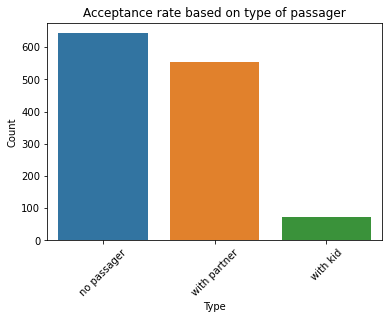

In [70]:
lst02 = []
lst02.append(['no passager',cleaned_ch_accepted.query('CoffeeHouse > 1 and passanger == "A"')['Y'].count()])
lst02.append(['with partner',cleaned_ch_accepted.query('CoffeeHouse > 1 and (passanger == "F" or passanger == "P")')['Y'].count()])
lst02.append(['with kid',cleaned_ch_accepted.query('CoffeeHouse > 1 and passanger == "K"')['Y'].count()])
df02 = pd.DataFrame(lst02, columns = ['Type', 'Count'])
sns.barplot(x=df02['Type'],y=df02['Count'])
plt.xticks(rotation='45')
plt.title("Acceptance rate based on type of passager")

#### 6. Compare the acceptance rate between drivers who go to a coffee house more than once a month and 
1. During morning hours
2. During afternoon hours
3. During evening hours

Text(0.5, 1.0, 'Acceptance rate based on time of visit')

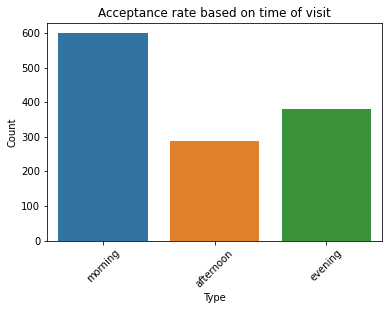

In [71]:
lst03 = []
lst03.append(['morning',cleaned_ch_accepted.query('CoffeeHouse > 1 and time < 11')['Y'].count()])
lst03.append(['afternoon',cleaned_ch_accepted.query('CoffeeHouse > 1 and time == 14')['Y'].count()])
lst03.append(['evening',cleaned_ch_accepted.query('CoffeeHouse > 1 and time > 14')['Y'].count()])
df03 = pd.DataFrame(lst03, columns = ['Type', 'Count'])
sns.barplot(x=df03['Type'],y=df03['Count'])
plt.xticks(rotation='45')
plt.title("Acceptance rate based on time of visit")

#### 7. Compare the acceptance rate between drivers who go to a coffee house more than once a month and 
1. Are unemployed
2. Are Students
3. Have occupation

Text(0.5, 1.0, 'Acceptance rate based on employment state')

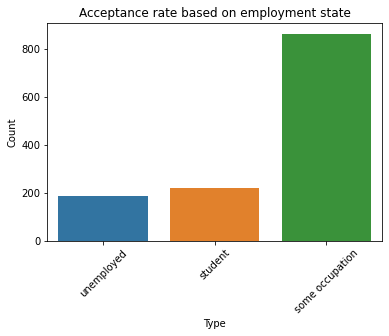

In [72]:
lst04 = []
lst04.append(['unemployed',cleaned_ch_accepted.query('CoffeeHouse > 1 and occupation == "Unemployed"')['Y'].count()])
lst04.append(['student',cleaned_ch_accepted.query('CoffeeHouse > 1 and occupation == "Student"')['Y'].count()])
lst04.append(['some occupation',cleaned_ch_accepted.query('CoffeeHouse > 1 and occupation != "Student" and occupation != "Unemployed"')['Y'].count()])
df04 = pd.DataFrame(lst04, columns = ['Type', 'Count'])
sns.barplot(x=df04['Type'],y=df04['Count'])
plt.xticks(rotation='45')
plt.title("Acceptance rate based on employment state")

#### 7. Compare the acceptance rate between drivers who go to a coffee house more than once a month and their gender


Text(0.5, 1.0, 'Acceptance rate based on gender')

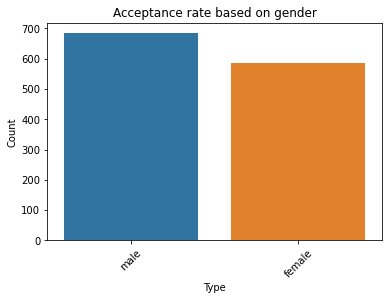

In [73]:
lst05 = []
lst05.append(['male',cleaned_ch_accepted.query('CoffeeHouse > 1 and gender == 1')['Y'].count()])
lst05.append(['female',cleaned_ch_accepted.query('CoffeeHouse > 1 and gender == 0')['Y'].count()])
df05 = pd.DataFrame(lst05, columns = ['Type', 'Count'])
sns.barplot(x=df05['Type'],y=df05['Count'])
plt.xticks(rotation='45')
plt.title("Acceptance rate based on gender")

#### 8. Profile of a customer accepting coupon at a Coffee House


Based on above observations, its observed that following customers are likely to accept coffee house coupon
1. Are under the age of 30
2. Are neither students or unemployed
3. Without kids as passangers
The acceptance is higher during morning hours before 11 AM.